In [1]:
#general
import io

# data
import numpy as np
import pandas as pd

# machine learning
import keras

# data visualization
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

In [3]:
import matplotlib.pyplot as plt

In [4]:
dataset_DiagnRatios = pd.read_csv("C:/Users/yuliya/Documents/scientific_research/DiagnRatios.csv")
dataset_EmisionLines = pd.read_csv("C:/Users/yuliya/Documents/scientific_research/EmissionLines.csv")
dataset_OutPar = pd.read_csv("C:/Users/yuliya/Documents/scientific_research/OutPar.csv")
dataset_rion_rout = pd.read_csv("C:/Users/yuliya/Documents/scientific_research/rion_rout.csv")

In [5]:
merged_df_EmDiag = pd.merge(dataset_EmisionLines, dataset_DiagnRatios, on='id', how='inner')  # Inner join

In [ ]:
for col in dataset_O.columns:
    print(f"Column '{col}' has {dataset_OutPar[col].isna().sum()} missing values")

Column 'id' has 0 missing values
Column 'dilc' has 68209 missing values
Column 'radius' has 38765 missing values
Column 'qh' has 44760 missing values
Column 'hden' has 36466 missing values
Column 'hpow' has 39106 missing values
Column 'fpow' has 278330 missing values
Column 'srdv' has 297084 missing values
Column 'sigm' has 297084 missing values
Column 'filling_factor' has 36552 missing values
Column 'element_heli_abund' has 38406 missing values
Column 'element_oxyg_abund' has 272974 missing values
Column 'element_nitr_abund' has 599198 missing values
Column 'element_neon_abund' has 374934 missing values
Column 'element_sulp_abund' has 367234 missing values
Column 'element_argo_abund' has 374934 missing values
Column 'element_iron_abund' has 374934 missing values
Column 'grain_abund' has 97283 missing values


In [7]:
num_rows = merged_df_EmDiag.iloc[:, 1:].isna().all(axis=1).sum()

print(f"Number of rows with NaN in all columns except the first: {num_rows}")

Number of rows with NaN in all columns except the first: 34165


In [8]:
merged_df_EmDiag_filled = merged_df_EmDiag.fillna(merged_df_EmDiag.mean())
print(merged_df_EmDiag_filled.info)

<bound method DataFrame.info of             id  he_1_3889a  he_1_4026a  he_1_4471a  he_1_5876a  n_2_6584a  \
0            1    0.088190     0.01683    0.035220    0.097610   0.011450   
1            2    0.015550     0.00315    0.006650    0.018660   0.018590   
2            3    0.093270     0.01735    0.036590    0.104180   0.055370   
3            4    0.090366     0.01738    0.036457    0.103104   0.011773   
4            5    0.087330     0.01706    0.035730    0.099130   0.014280   
...        ...         ...         ...         ...         ...        ...   
653324  653325    0.090366     0.01671    0.035710    0.102070   0.011773   
653325  653326    0.090366     0.01675    0.035830    0.102800   0.011773   
653326  653327    0.090366     0.01738    0.036457    0.103104   0.011773   
653327  653328    0.090366     0.01738    0.036457    0.103104   0.011773   
653328  653329    0.090366     0.01673    0.035770    0.102440   0.011773   

        he_1_6678a  he_1_7065a  he_2_4686a 

In [9]:
new_out = dataset_OutPar.iloc[:, :2]
new_df_no_na = new_out.dropna()
print(new_df_no_na.shape)

(585120, 2)


In [10]:
input_to_model = pd.merge(merged_df_EmDiag_filled, new_df_no_na, on='id', how='inner')

#Extract features (X) and target (Y)
X = input_to_model.iloc[:, 1:-1]  # All columns except first (id) and last (Y)
y = input_to_model.iloc[:, -1]    # Last column as target variable

# Split data into training and test sets (80%-20% split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
nrmse = rmse / (np.max(y_test) - np.min(y_test))  # Normalized RMSE

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Normalized RMSE: {nrmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 6: Print model coefficients
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error (MSE): 0.18
Root Mean Squared Error (RMSE): 0.43
Normalized RMSE: 0.0849
Mean Absolute Error (MAE): 0.29
R² Score: 0.21
Model Coefficients: [ 0.00000000e+00 -2.09910229e-01  1.33443032e+00  2.47731449e+00
  8.80861622e+05 -4.19367987e+00  2.45327782e-01  1.71656223e-01
  2.68074802e-02  2.20215406e+05  4.53468456e-01 -2.50488184e-01
 -9.21830375e-02 -8.80861622e+05 -9.10759161e-01  6.76655193e-01
  1.29441985e+00 -2.17398428e+00 -1.76172324e+06  1.49740972e+00
  2.20215406e+05  1.72004729e-01 -9.10287628e-01  2.59585083e-01
  7.46810415e-02  8.27971251e-05 -1.95583108e-02  2.52914493e-01
 -6.02975222e-03  3.60215829e-03 -2.37521163e-03  6.23365289e-03
  6.71132880e-04 -4.67714372e-06]
Intercept: 2073.1153989476775


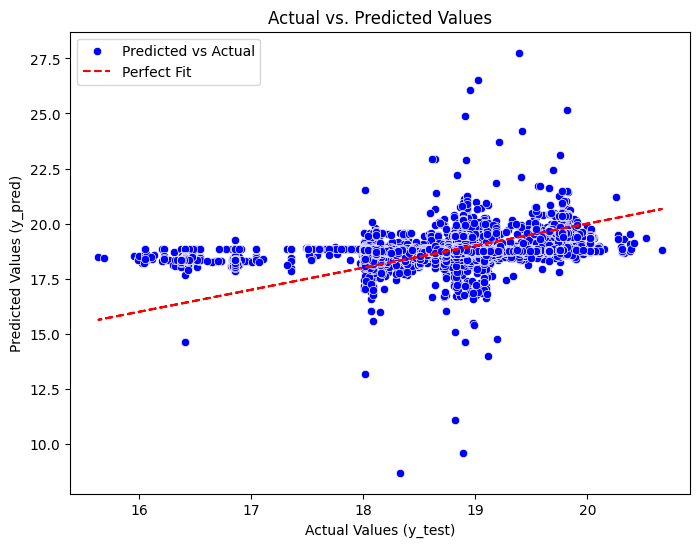

In [13]:
# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label="Predicted vs Actual")
plt.plot(y_test, y_test, color='red', linestyle='dashed', label="Perfect Fit")  # Diagonal line

plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()